In [69]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [70]:
def abrir_datos(url):
    with open(url, 'r') as f:
        json_data = json.load(f)
    dfs = []
    for data in json_data:
        tickers_data = data.pop('tickers')
        for ticker, ticker_data in tickers_data.items():
            df_ticker = json_normalize(ticker_data)
            df_ticker.insert(0, 'ticker', ticker)
            df_ticker.insert(1, 'horario_muestreo_datos', data['horario_muestreo_datos'])
            df_ticker.insert(2, 'caucion_a_un_dia_ultimo_trade_tasa', data['caucion_a_un_dia']['ultimo_trade'][0])
            df_ticker.insert(3, 'caucion_a_un_dia_ultimo_trade_monto', data['caucion_a_un_dia']['ultimo_trade'][1])
            dfs.append(df_ticker)
    result = pd.concat(dfs, ignore_index=True)
    return result


def limpiar_datos(df):
    columns_to_process = [
        'COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO',
        'COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO',
        'TOMAR_TASA_ABRIENDO_PLAZO_CERCANO',
        'TOMAR_TASA_ABRIENDO_PLAZO_LEJANO'
    ]

    for column in columns_to_process:
        tasa_column = column + "_TASA"
        #volume_column = column + "_VOLUMEN"
        df[tasa_column] = df[column].apply(lambda x: x[0][0] if len(x) > 0 else None)
        #df[volume_column] = df[column].apply(lambda x: x[0][1] if len(x) > 0 else None)

    df.rename(columns={'horario_muestreo_datos': 'fecha'}, inplace=True)
    df.set_index("fecha",inplace=True)
    df.drop(columns=columns_to_process, inplace=True)
    return df


def adf_test(time_series):
    result = adfuller(time_series)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))


In [71]:
df=abrir_datos(url="/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/datos_completos.json")

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_42440/3263325853.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_ticker = json_normalize(ticker_data)


In [72]:
AL30D_N = df[df['ticker'] == 'AL30D'].reset_index(drop=True)
GD30D_N = df[df['ticker'] == 'GD30D'].reset_index(drop=True)
AL30_N = df[df['ticker'] == 'AL30'].reset_index(drop=True)
GD30_N = df[df['ticker'] == 'GD30'].reset_index(drop=True)

In [73]:
AL30D=limpiar_datos(AL30D_N)
AL30=limpiar_datos(AL30_N)
GD30D=limpiar_datos(GD30D_N)
GD30=limpiar_datos(GD30_N)

In [74]:
dato_muestra=GD30

# CORRELACION ENTRE LOS DATOS

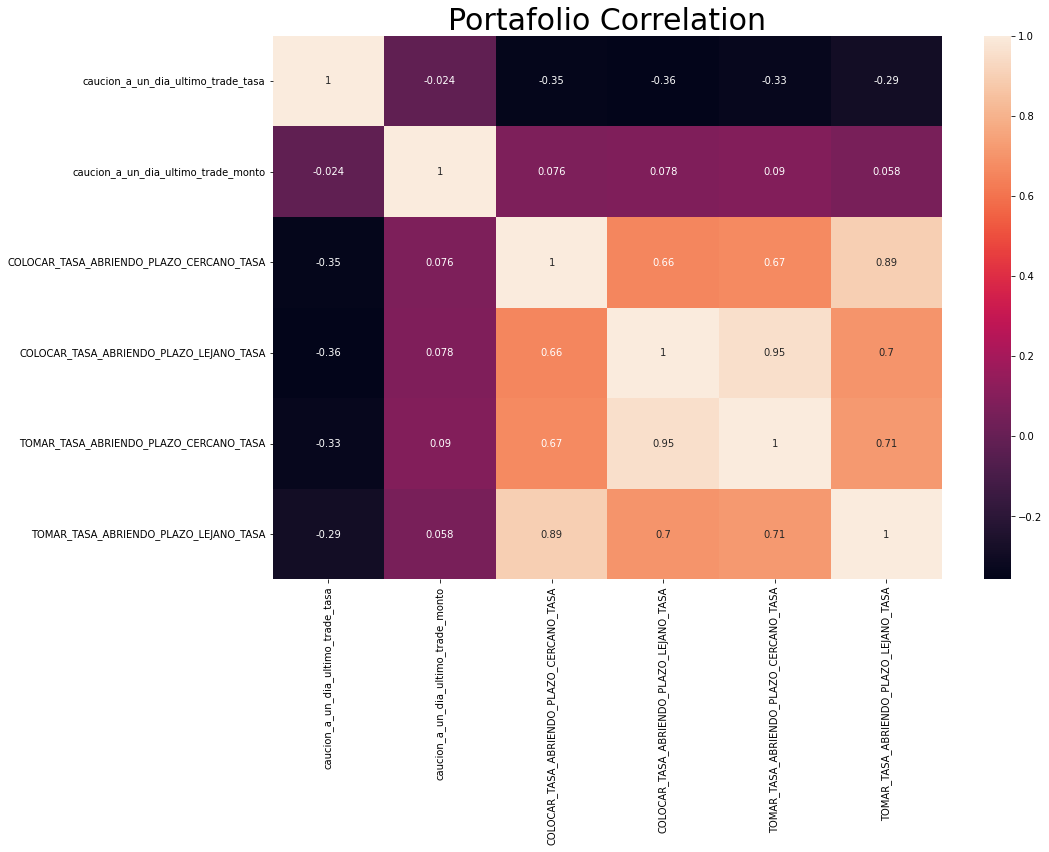

In [76]:
correlation_mat = dato_muestra.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

# GRAFICAS GENERALES

Text(0.5, 1.0, 'Grafica Causion a un dia ultimo trade tasa')

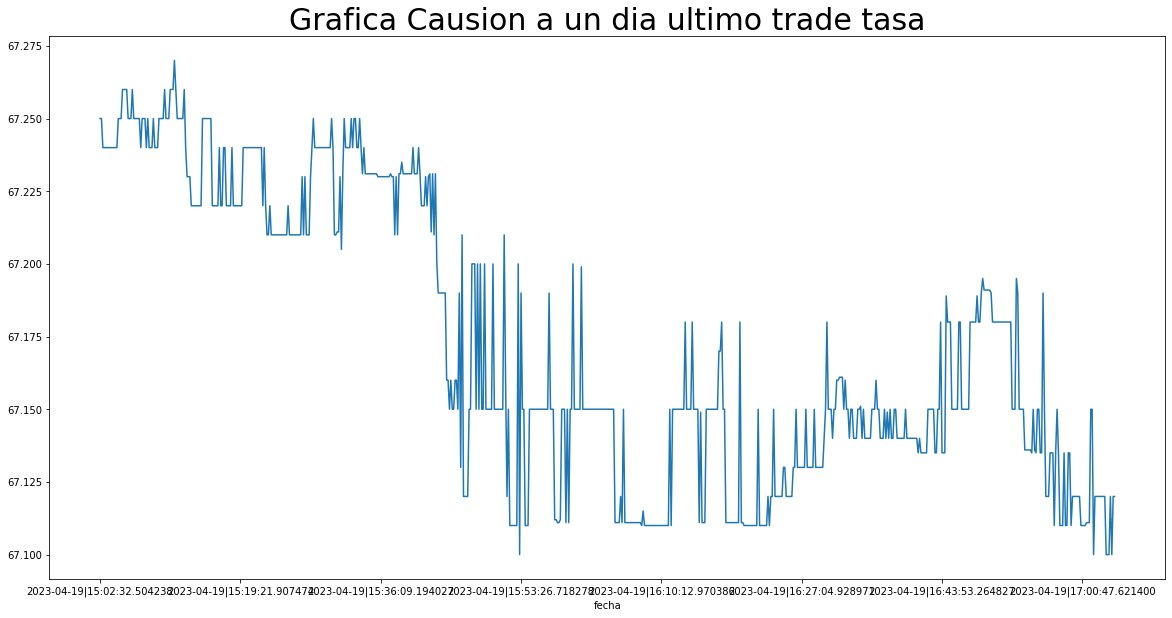

In [77]:
dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"].plot(figsize=(20,10))
plt.title("Grafica Causion a un dia ultimo trade tasa", fontsize=30)

Text(0.5, 1.0, 'Grafica Causion a un dia ultimo trade monto')

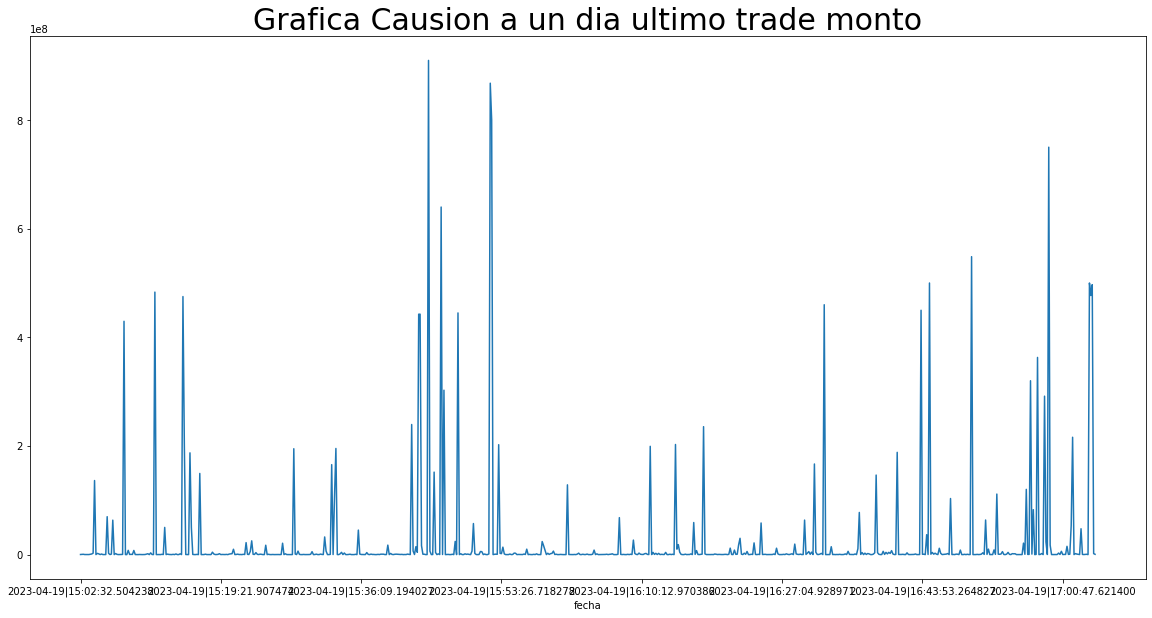

In [79]:
dato_muestra["caucion_a_un_dia_ultimo_trade_monto"].plot(figsize=(20,10))
plt.title("Grafica Causion a un dia ultimo trade monto", fontsize=30)

Text(0.5, 1.0, 'Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano')

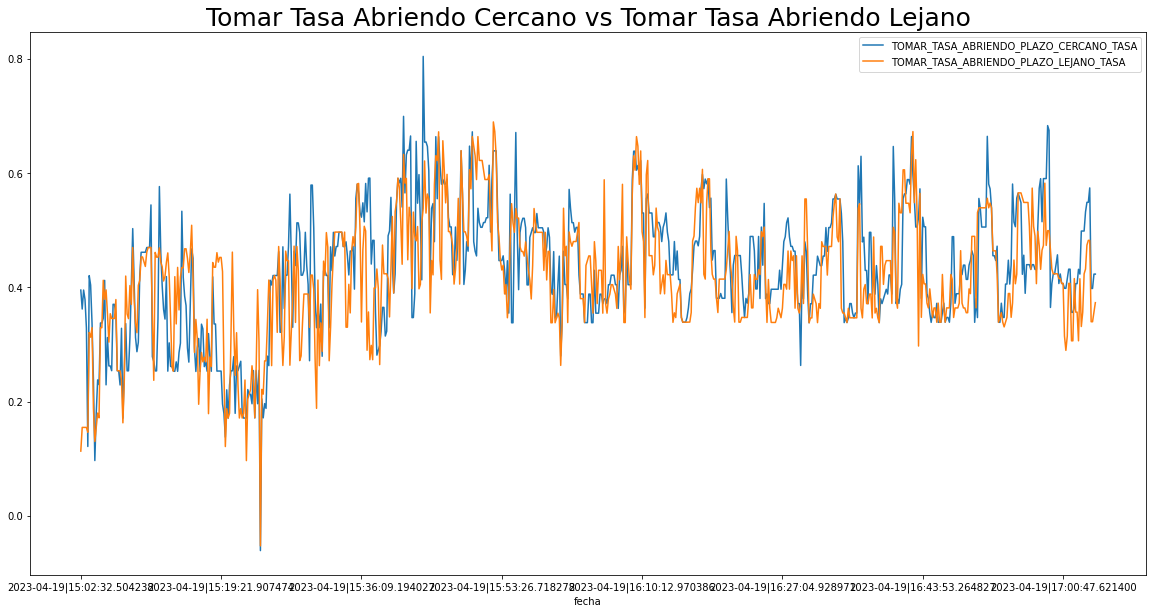

In [80]:
dato_muestra[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano", fontsize=25)

Text(0.5, 1.0, 'Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano')

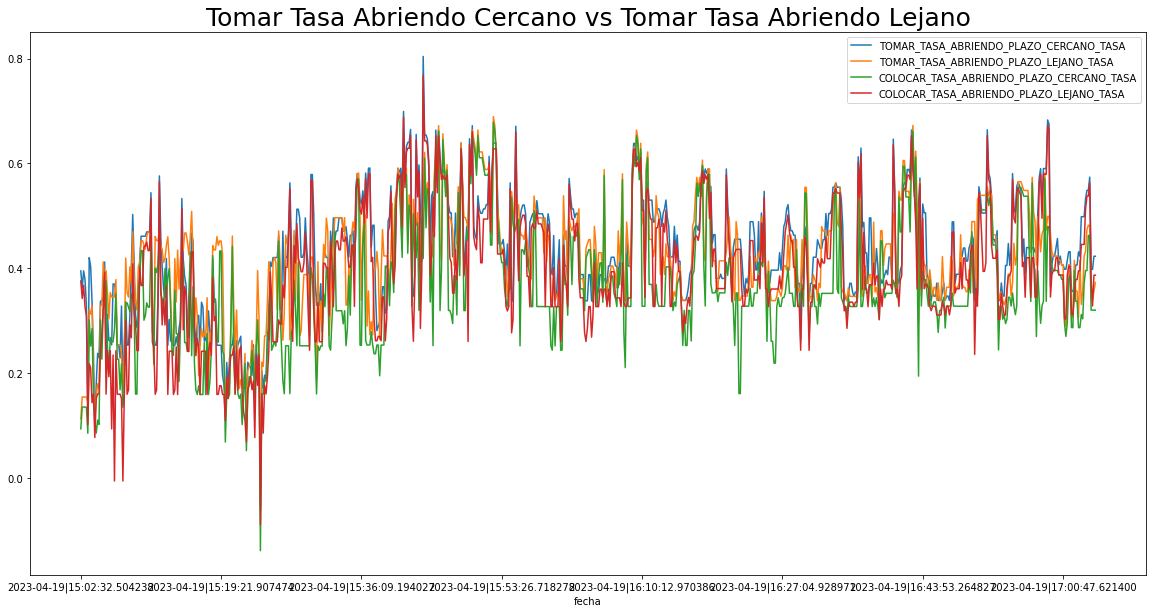

In [83]:
dato_muestra[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano", fontsize=25)

# SPREAD

In [108]:
dato_muestra

,ticker,caucion_a_un_dia_ultimo_trade_tasa,caucion_a_un_dia_ultimo_trade_monto,COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,SPREAD_1,SPREAD_COLOCAR
fecha,,,,,,,,,
2023-04-19|15:02:32.504238,GD30,67.25,1.830604e+05,0.094031,0.375862,0.395143,0.113280,-67.155969,0.001398
2023-04-19|15:02:42.504503,GD30,67.25,4.130230e+05,0.135524,0.342702,0.361980,0.154777,-67.114476,0.002015
2023-04-19|15:02:52.522560,GD30,67.24,5.732782e+05,0.135524,0.367606,0.395196,0.154777,-67.104476,0.002016
2023-04-19|15:03:02.527854,GD30,67.24,1.162310e+05,0.135524,0.326107,0.378612,0.154777,-67.104476,0.002016
2023-04-19|15:03:12.557203,GD30,67.24,6.378938e+04,0.135524,0.309571,0.328846,0.154777,-67.104476,0.002016
...,...,...,...,...,...,...,...,...,...
2023-04-19|17:04:00.723694,GD30,67.10,5.000000e+08,0.462803,0.562992,0.573976,0.482144,-66.637197,0.006897
2023-04-19|17:04:10.755687,GD30,67.12,4.769245e+08,0.320393,0.378654,0.397996,0.339719,-66.799607,0.004773
2023-04-19|17:04:20.918919,GD30,67.10,4.969099e+08,0.320393,0.328458,0.397996,0.339719,-66.779607,0.004775


fecha
2023-04-19|15:02:32.504238    0.000940
2023-04-19|15:02:42.504503    0.001355
2023-04-19|15:02:52.522560    0.001355
2023-04-19|15:03:02.527854    0.001355
2023-04-19|15:03:12.557203    0.001355
                                ...   
2023-04-19|17:04:00.723694    0.004628
2023-04-19|17:04:10.755687    0.003204
2023-04-19|17:04:20.918919    0.003204
2023-04-19|17:04:30.983520    0.003204
2023-04-19|17:04:41.317851    0.003204
Name: COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA, Length: 724, dtype: float64

In [117]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)
dato_muestra["SPREAD_COLOCAR"]=(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)-dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

<Axes: xlabel='fecha'>

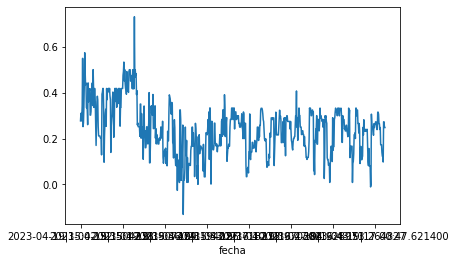

In [118]:
dato_muestra["SPREAD_COLOCAR"].plot()

In [ ]:
***colocar cercano,colocar negativo buscamos spread positivo**
**tomar cercano,**

In [107]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]/dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]

Text(0.5, 1.0, 'Colocar Tasa Abriendo Cercano vs Colocar Tasa Abriendo Lejano')

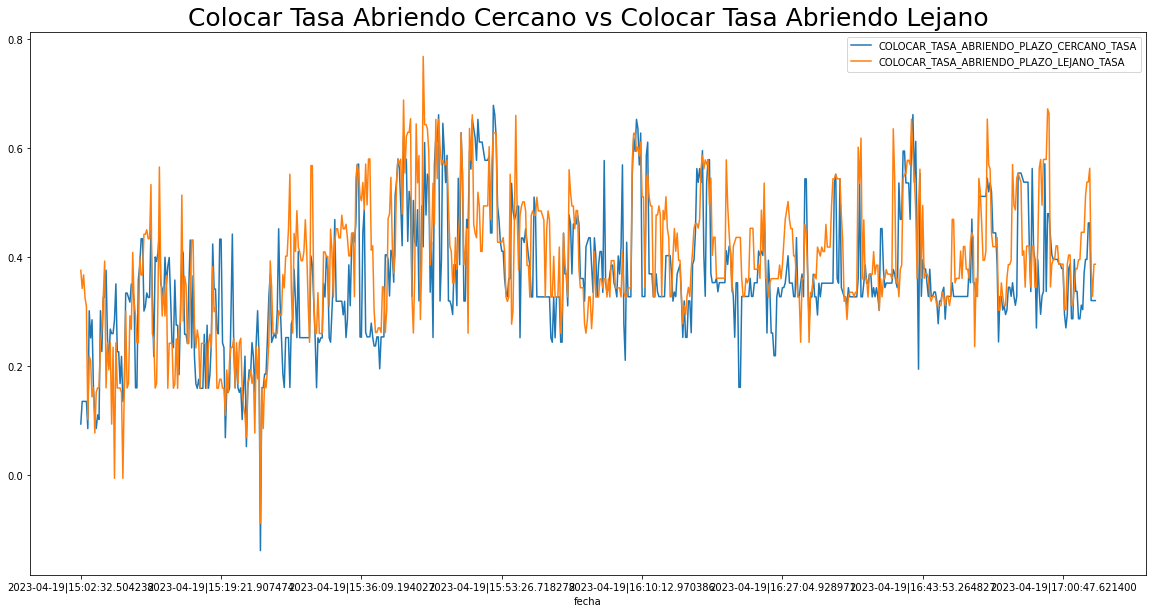

In [81]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Colocar Tasa Abriendo Cercano vs Colocar Tasa Abriendo Lejano", fontsize=25)

# MEDIAS MOVILES

**1.TASA_ABRIENDO_PLAZO_CERCANO**

ADF Statistic: -5.656723
p-value: 0.000001
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


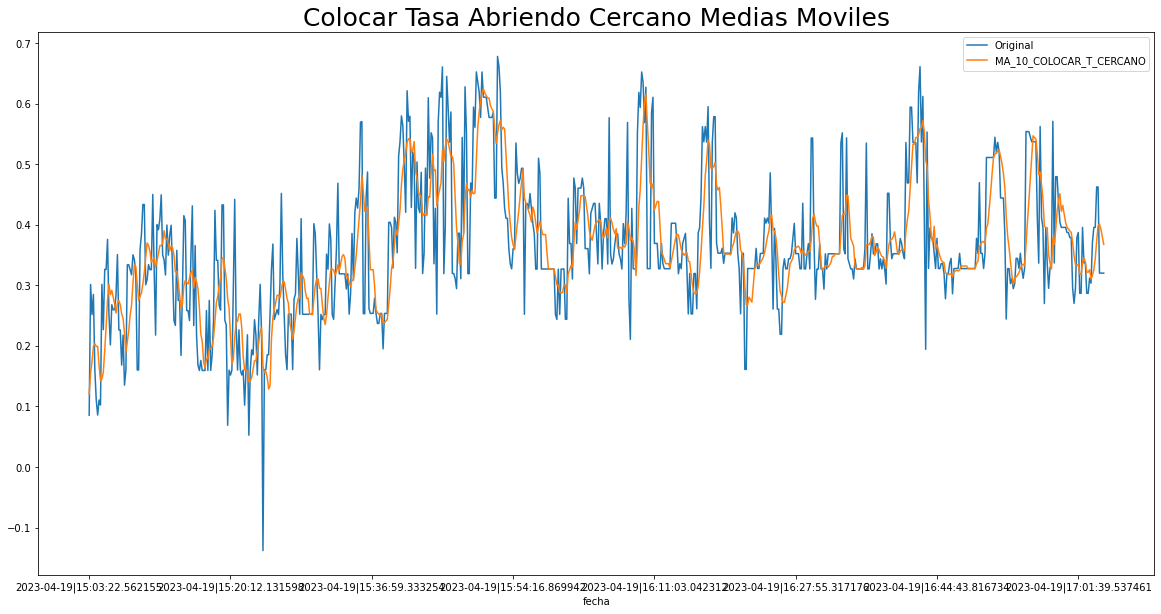

In [87]:
media_movil_1=pd.DataFrame()
media_movil_1["Original"]=dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA']
media_movil_1['MA_10_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=6).mean()
#media_movil_1['MA_30_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=30).mean()
#media_movil_1['MA_70_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=70).mean()
media_movil_1.dropna(inplace=True)
media_movil_1.plot(figsize=(20,10))
plt.title("Colocar Tasa Abriendo Cercano Medias Moviles", fontsize=25)

adf_test(media_movil_1["Original"])

ADF Statistic: -5.467654
p-value: 0.000002
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


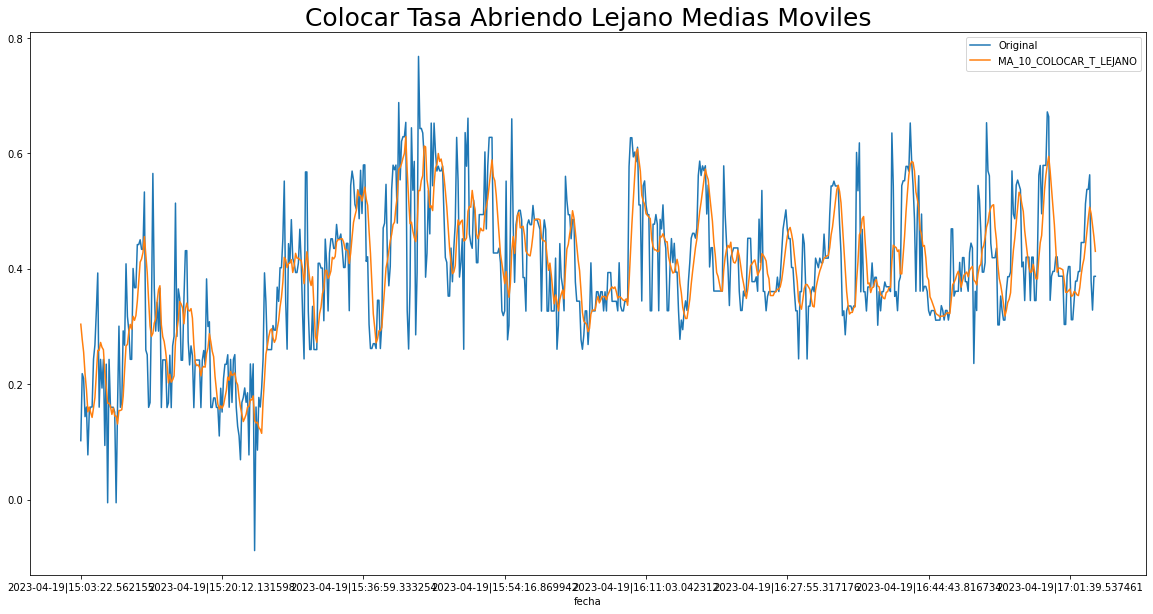

In [88]:
media_movil_2=pd.DataFrame()
media_movil_2["Original"]=dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA']
media_movil_2['MA_10_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=6).mean()
#media_movil_2['MA_30_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=30).mean()
#media_movil_2['MA_70_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=70).mean()
media_movil_2.dropna(inplace=True)
media_movil_2.plot(figsize=(20,10))

plt.title("Colocar Tasa Abriendo Lejano Medias Moviles", fontsize=25)
adf_test(media_movil_2["Original"])

ADF Statistic: -5.352261
p-value: 0.000004
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


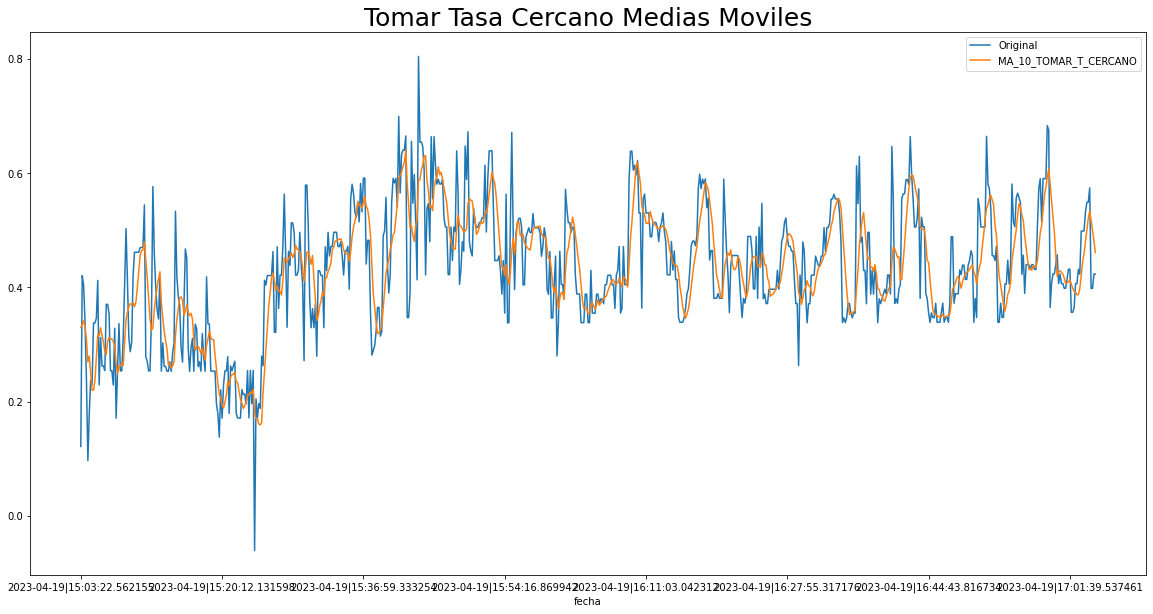

In [91]:
media_movil_3=pd.DataFrame()
media_movil_3["Original"]=dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA']
media_movil_3['MA_10_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=6).mean()
#media_movil_3['MA_30_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=30).mean()
#media_movil_3['MA_70_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=70).mean()
media_movil_3.dropna(inplace=True)
media_movil_3.plot(figsize=(20,10))
plt.title("Tomar Tasa Cercano Medias Moviles", fontsize=25)
adf_test(media_movil_3["Original"])

ADF Statistic: -6.149424
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


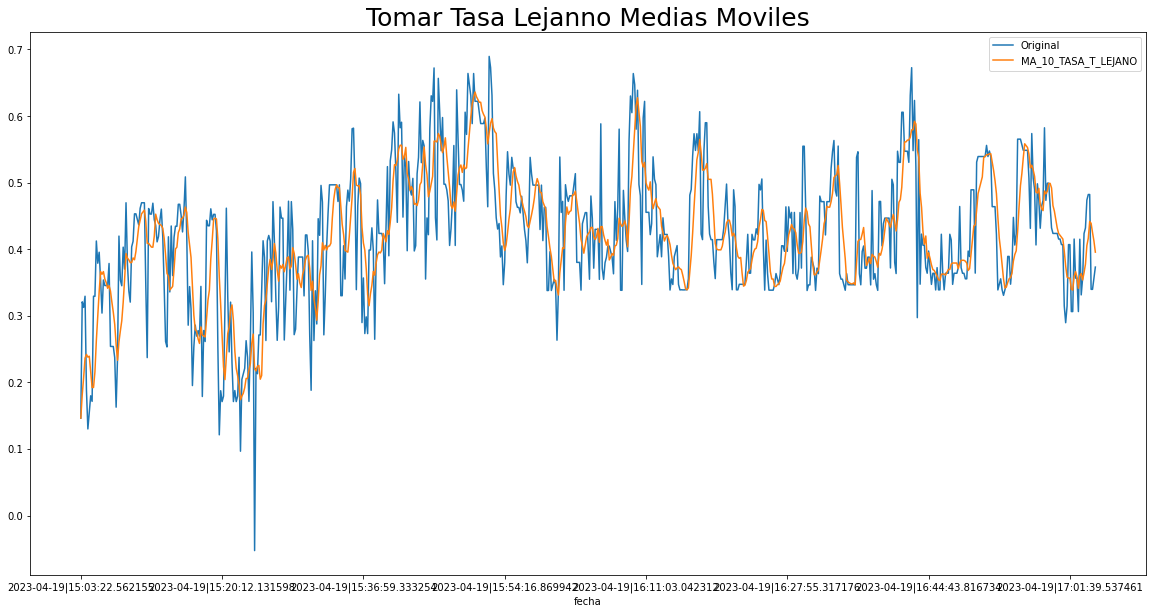

In [92]:
media_movil_4=pd.DataFrame()
media_movil_4["Original"]=dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA']
media_movil_4['MA_10_TASA_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=6).mean()
#media_movil_4['MA_30_COLOCAR_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=30).mean()
#media_movil_4['MA_70_COLOCAR_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=70).mean()
media_movil_4.dropna(inplace=True)
media_movil_4.plot(figsize=(20,10))
plt.title("Tomar Tasa Lejanno Medias Moviles", fontsize=25)
adf_test(media_movil_4["Original"])

# DISTRIBUCIONES

**COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

Kurtosis:  0.494819575389037
Skewness:  0.2764571294121702


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


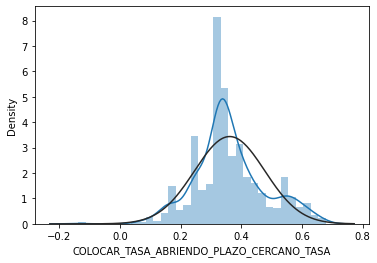

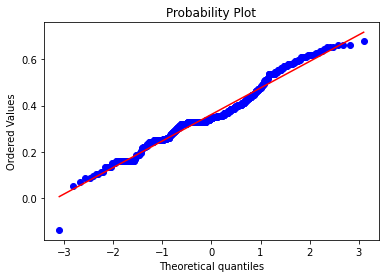

In [93]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], plot=plt)
kurt=kurtosis(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"])
skew=skew(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"])
print("Kurtosis: ",kurt)
print("Skewness: ",skew)

**COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


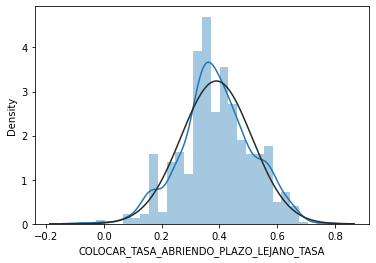

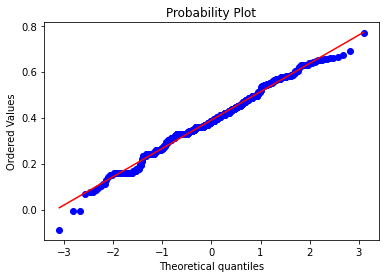

In [94]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], plot=plt)
#kurt=kurtosis(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"])
#skew=skew(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"])
#print("Kurtosis: ",kurt)
#print("Skewness: ",skew)

**TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


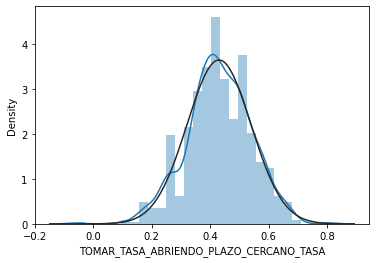

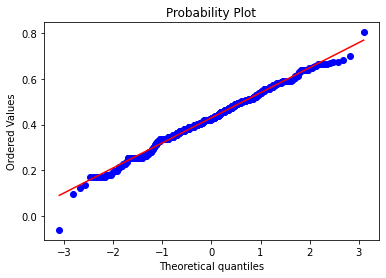

In [95]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], plot=plt)

**TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


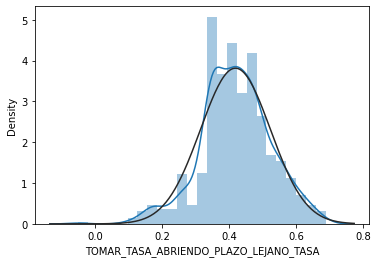

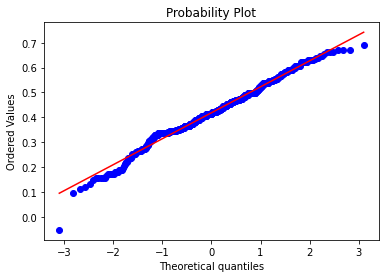

In [96]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], plot=plt)

# ANALISIS DE SERIES DE TIEMPO

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

**COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

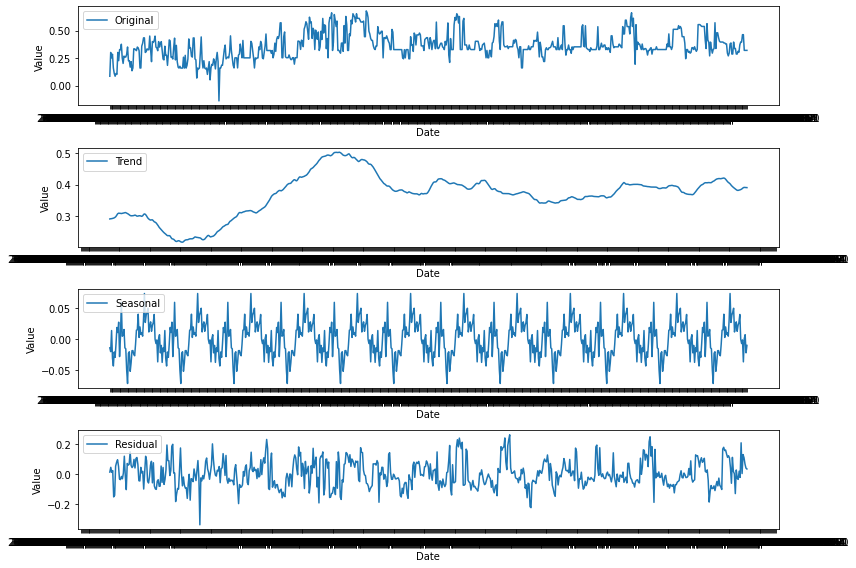

In [98]:
decomposition = seasonal_decompose(media_movil_1["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_1["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


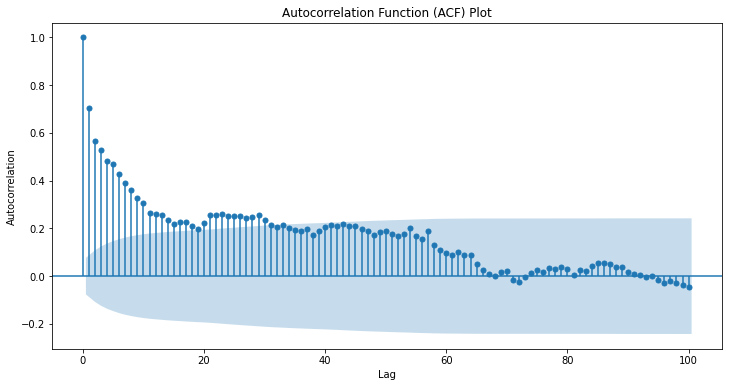

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_1["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()


**COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

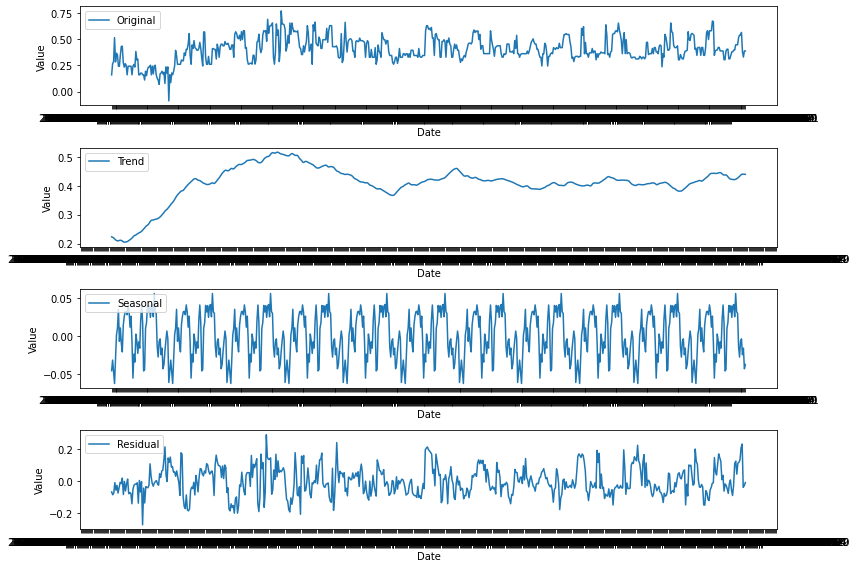

In [57]:
decomposition = seasonal_decompose(media_movil_2["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_2["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



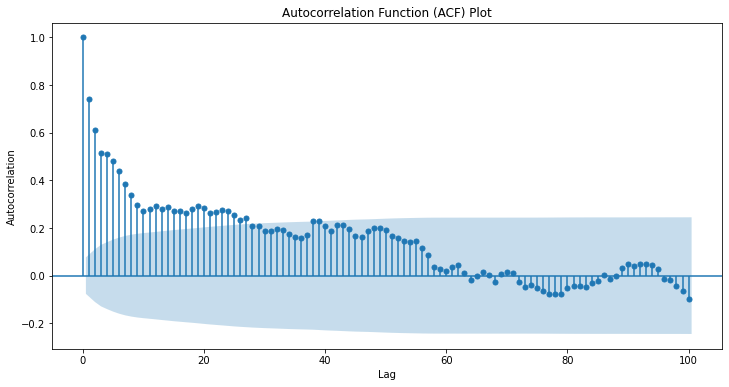

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_2["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

**TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

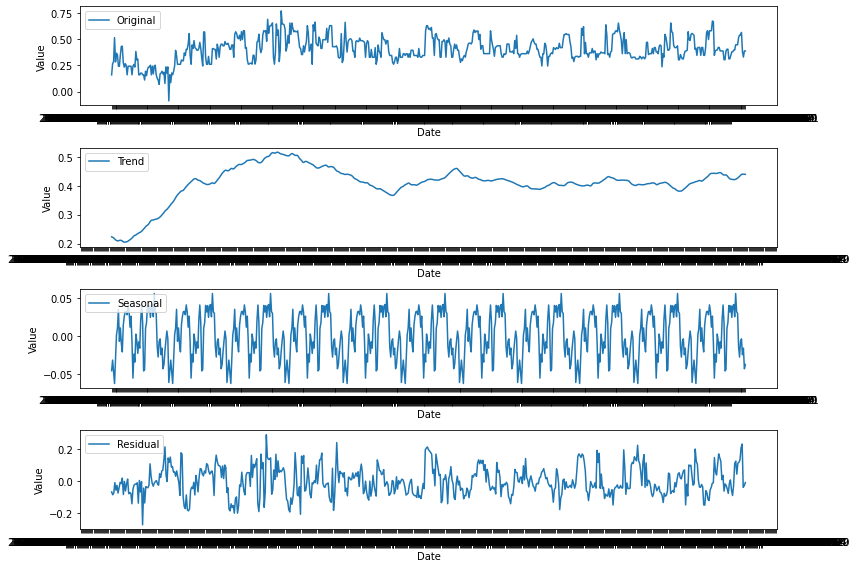

In [49]:
decomposition = seasonal_decompose(media_movil_3["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_3["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



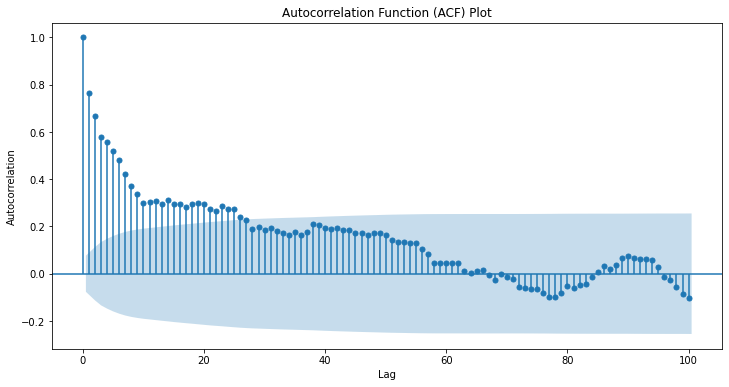

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_3["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

**TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

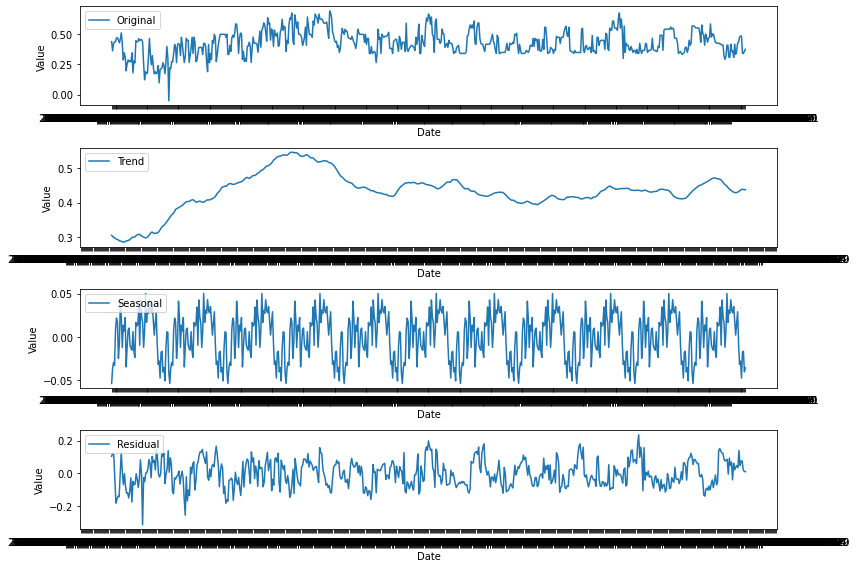

In [56]:
decomposition = seasonal_decompose(media_movil_4["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_4["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

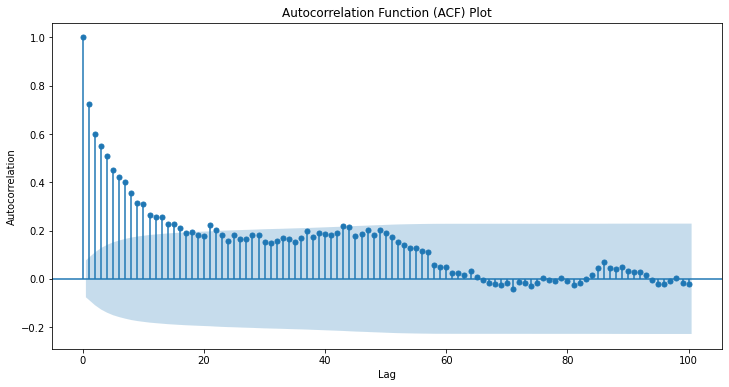

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_4["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()